<a href="https://colab.research.google.com/github/powerSeries/NN-projects/blob/main/project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abbreviated data preparation for the Wine Quality Problem (Project 1)

In [3]:
# Import Required Libraries  
import matplotlib.pyplot as plt 
import numpy as np 
# This time we need to also import pandas
import pandas as pd 

# Read in white wine data 
# USES PANDAS (pd) to create a PANDAS DataFrame OBJECT:
white = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv", sep =';') 

# Read in red wine data 
# USES PANDAS (pd) to create a PANDAS DataFrame OBJECT:
red = pd.read_csv("http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv", sep =';') 

# Add `type` column to `red` with price one  - done with PANDAS
red['type'] = 1
  
# Add `type` column to `white` with price zero - done with PANDAS 
white['type'] = 0
  
# Append `white` to `red` - done with PANDAS
# AFTER THIS WE HAVE ALL WINES (red and white) in a SINGLE pandas DataFrame
wines = red.append(white, ignore_index = True) 

# Import SKLEARN
import sklearn
# Import `train_test_split` from `sklearn.model_selection` 
from sklearn.model_selection import train_test_split 

# Specify the  data - 
X1 = wines.iloc[:, 0:11]
X2 = wines.iloc[:,12]
X = pd.concat([X1,X2],axis = 1)

# Specify the QUALITY target labels and flatten the array 
y = np.ravel(wines.quality) 

# Splitting the data set for training and validating  - Done with SKLEARN
X_train, X_valid, y_train, y_valid = train_test_split( 
                 X, y, test_size = 0.25, random_state = 45) 

# CONVERTING X_train & X_test DataFrame s to TF tensors
# Will USE NumPy, TF & Keras after this
# import tensorflow as tf 

Xtrain = X_train.to_numpy()
X_valid = X_valid.to_numpy()

# In reality:
# [1] ALL THE Xtrain patterns (with their y_train targets) 
# will be used for TRAINING ([TR]), as Xtrain & y_train
# [2] MOST OF THE X_valid patterns (and their y_valid targets) 
#  will be used for VALIDATION ([TT]),  as X_val & y_val
# BUT WE WILL SET ASIDE THE LAST 10 for "testing" ([TS])
#  as X_tst & y_tst

# To separate the last 10 in X_valid, let's first see the shape of X_valid
X_valid.shape

# And verify also the shape of y_valid
y_valid.shape

# Retain the first 1615 for validation ([TT])
Xval = X_valid[:1615]
Xval.shape

# and now set aside the last 10 for "test"
Xtst = X_valid[1615:]
Xtst.shape

y_val = y_valid[:1615]
y_val.shape

y_tst = y_valid[1615:]
y_tst.shape

y_tst

# NOW, IN ADDITION, CREATE THE TARGETS AS ONE-HOT-ENCODED 4 quality LEVELS
# We will track these few targets through the conversion process
y_train[272:283]

# Function create rank-1 arrays where 3,4,5,6,7,8,9 are mapped to 1 or 2 or 3 or 4 
def to_4cs(x):
  lx = len(x)
  results = np.zeros(lx)
  for i in range(lx):
      # print( "start")
      xa = x[i];
      if xa <= 3:
          results[i] = 1      # 1, 2 and 3 map to Q-LEVEL 1 ( BAD Wine)
      elif xa <=6:
          results[i] = 2      # 4, 5 and 6 map to Q-LEVEL 2  (MEDIUM Wine)
      elif xa <=8:
          results[i] = 3      # 7 and 8 and 6 map to Q-LEVEL 3  (GOOD Wine)
      else:
          results[i] = 4      # 9 and above map to Q-LEVEL 4  (EXCELLENT Wine)
    # results[i, label] = 1.
  results = results.astype(int)
  return results

train_labels = to_4cs(y_train)
val_labels = to_4cs(y_val)
tst_labels = to_4cs(y_tst)

# Let's verify that the trainnig targets that we are tracking
# were converted to levels (1 = BAD; 2 = MEDIUM; 3 = GOOD; 4- EXCELLENT) correctly:
train_labels[272:283]

# NOW, ONE-HOT ENCODING OF ALL 3  TARGET ARRAYS
# define a function to do the one-hot-encoding of output labels

def to_one_hot(labels, dimension=4):
    results = np.zeros((len(labels), dimension))
    for i, label in enumerate(labels-1):
        results[i, label] = 1.
    return results

one_hot_train_labels = to_one_hot(train_labels)
one_hot_val_labels = to_one_hot(val_labels)
one_hot_tst_labels = to_one_hot(tst_labels)

#Let's verify that the training targets we have tracked were
# one-hot encoded correctly
one_hot_train_labels[272:283,]

# SO, AFTER EXECUTING THIS CELL, YOU WILL HAVE:
# FOR TRAINING:
#  Xtrain (4872, 12)...y_train (4872,)...train_labels(4872,)....one_hot_train_labels (4872,4)
# FOR VALIDATING:
#  Xval (1615, 12)...y_val (1615,)...val_labels(1615,)...one_hot_val_labels (1615,4)
# FOR TESTING:
#  Xtst (10, 12)...y_tst (10,)...tst_labels(10,)... one_hot_tst_labels (10,4)
# PLEASE DO NOT CHANGE THE NAMES OF THESE VARIABLES (So that instructor can use them)

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.]])

In [4]:
import copy

## Normalize Data
copyTrain = copy.copy(Xtrain)
copyVal = copy.copy(Xval)
copyTest = copy.copy(Xtst)

mean = Xtrain.mean(axis=0)
copyTrain -= mean
std = Xtrain.std(axis=0)

copyTrain /= std

copyTest -= mean
copyTest /= std

copyVal -= mean
copyVal /= std

 ++++  END OF THE DATA PREPARATION PART ++++ 


# Part 2: Regression Model

### Regression Model 1

In [13]:
# import libraries
from tensorflow import keras
from tensorflow.keras import layers

def build_regmodl1():
  regmodl1 = keras.Sequential([
    layers.Dense(8, activation="relu"),
    layers.Dense(1),
  ])
  regmodl1.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return regmodl1

def PrintFinalValues(model_history):
  history_dict = model_history.history
  loss_values = history_dict['loss']
  mae_values = history_dict['mae']
  val_loss_values = history_dict['val_loss']
  val_mae_values = history_dict['val_mae']

  print("Final Loss: ", loss_values[len(loss_values) - 1])
  print("Final MAE: ", mae_values[len(mae_values) - 1])
  print("Final Validation Loss: ", val_loss_values[len(val_loss_values) - 1])
  print("Final Validation MAE: ", val_mae_values[len(val_mae_values) - 1])

# Builld the model
regmod1 = build_regmodl1()

# Run fit and store data
regmodl1_history = regmod1.fit(x=copyTrain, y=y_train, epochs=50, verbose=2, validation_data=(copyVal, y_val))

# Show Model Summary
regmod1.summary()

PrintFinalValues(regmodl1_history)

Epoch 1/50
153/153 - 1s - loss: 29.0321 - mae: 5.2134 - val_loss: 21.0750 - val_mae: 4.3934 - 773ms/epoch - 5ms/step
Epoch 2/50
153/153 - 0s - loss: 15.3441 - mae: 3.6527 - val_loss: 9.6941 - val_mae: 2.7939 - 247ms/epoch - 2ms/step
Epoch 3/50
153/153 - 0s - loss: 6.4121 - mae: 2.1381 - val_loss: 3.7074 - val_mae: 1.5525 - 249ms/epoch - 2ms/step
Epoch 4/50
153/153 - 0s - loss: 2.9042 - mae: 1.3463 - val_loss: 2.2116 - val_mae: 1.1729 - 233ms/epoch - 2ms/step
Epoch 5/50
153/153 - 0s - loss: 1.8836 - mae: 1.0711 - val_loss: 1.5780 - val_mae: 0.9825 - 238ms/epoch - 2ms/step
Epoch 6/50
153/153 - 0s - loss: 1.3811 - mae: 0.9129 - val_loss: 1.2631 - val_mae: 0.8670 - 229ms/epoch - 1ms/step
Epoch 7/50
153/153 - 0s - loss: 1.0962 - mae: 0.8120 - val_loss: 1.0675 - val_mae: 0.7849 - 246ms/epoch - 2ms/step
Epoch 8/50
153/153 - 0s - loss: 0.9083 - mae: 0.7418 - val_loss: 0.9376 - val_mae: 0.7310 - 238ms/epoch - 2ms/step
Epoch 9/50
153/153 - 0s - loss: 0.7910 - mae: 0.6915 - val_loss: 0.8342 - val

In [14]:
def plot_model_history(model_history):
  history_dict = model_history.history
  history_dict.keys()

  loss_values = history_dict["loss"]
  val_loss_values = history_dict["val_loss"]

  epochs = range(1, len(loss_values) + 1)


  # Plot current data
  plt.plot(epochs, loss_values, "bo", label="Training Loss")
  plt.plot(epochs, val_loss_values, "b", label="Validation Loss")
  plt.title("Training and Validation Loss")
  plt.xlabel("Epochs")
  plt.ylabel("Accuracy")
  plt.legend()
  plt.show()
  return

Plotting Regression Model 1



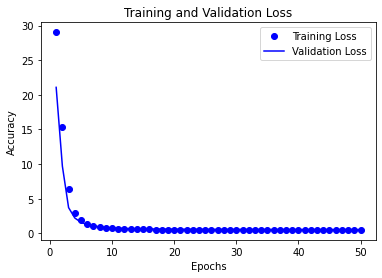

In [15]:
plot_model_history(regmodl1_history)

### Regression Model 2

In [23]:
# reg mod 2
def build_regmodl2():
  model = keras.Sequential([
    layers.Dense(128, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(30, activation="relu"),
    layers.Dense(5, activation="relu"),
    layers.Dense(1),
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model;

regmodl2 = build_regmodl2();

regmodl2_history = regmodl2.fit(x=copyTrain, y=y_train, epochs=50, verbose=2, validation_data=(copyVal, y_val))

regmodl2.summary()

PrintFinalValues(regmodl2_history)

Epoch 1/50
153/153 - 2s - loss: 4.1630 - mae: 1.4357 - val_loss: 1.1416 - val_mae: 0.8054 - 2s/epoch - 15ms/step
Epoch 2/50
153/153 - 0s - loss: 0.7802 - mae: 0.6866 - val_loss: 0.9882 - val_mae: 0.7584 - 481ms/epoch - 3ms/step
Epoch 3/50
153/153 - 1s - loss: 0.6059 - mae: 0.6061 - val_loss: 0.5770 - val_mae: 0.5754 - 550ms/epoch - 4ms/step
Epoch 4/50
153/153 - 0s - loss: 0.5386 - mae: 0.5720 - val_loss: 0.6743 - val_mae: 0.6253 - 472ms/epoch - 3ms/step
Epoch 5/50
153/153 - 1s - loss: 0.5184 - mae: 0.5617 - val_loss: 0.7417 - val_mae: 0.6717 - 538ms/epoch - 4ms/step
Epoch 6/50
153/153 - 0s - loss: 0.5014 - mae: 0.5530 - val_loss: 0.6073 - val_mae: 0.6001 - 482ms/epoch - 3ms/step
Epoch 7/50
153/153 - 0s - loss: 0.4903 - mae: 0.5463 - val_loss: 0.5247 - val_mae: 0.5490 - 496ms/epoch - 3ms/step
Epoch 8/50
153/153 - 0s - loss: 0.4870 - mae: 0.5450 - val_loss: 0.6422 - val_mae: 0.6173 - 496ms/epoch - 3ms/step
Epoch 9/50
153/153 - 0s - loss: 0.4713 - mae: 0.5368 - val_loss: 0.7326 - val_mae:

Plotting Regression Model 2

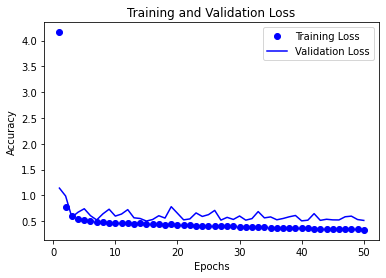

In [24]:
plot_model_history(regmodl2_history)

### Regression Model 3

In [40]:
# reg mod 3
def build_regmodl3():
  model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dense(125, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(30, activation="relu"),
    layers.Dense(5, activation="relu"),
    layers.Dense(1)                    
  ])
  model.compile(optimizer="rmsprop", loss="mse", metrics=["mae"])
  return model;

regmodl3 = build_regmodl3()

regmodl3_history = regmodl3.fit(x=copyTrain, y=y_train, epochs=50, verbose=2, validation_data=(copyVal, y_val))

regmodl3.summary()

PrintFinalValues(regmodl3_history)

Epoch 1/50
153/153 - 1s - loss: 2.5006 - mae: 1.0879 - val_loss: 0.8493 - val_mae: 0.6907 - 1s/epoch - 9ms/step
Epoch 2/50
153/153 - 0s - loss: 0.7861 - mae: 0.6914 - val_loss: 0.5949 - val_mae: 0.5933 - 390ms/epoch - 3ms/step
Epoch 3/50
153/153 - 0s - loss: 0.6655 - mae: 0.6352 - val_loss: 0.6604 - val_mae: 0.6293 - 393ms/epoch - 3ms/step
Epoch 4/50
153/153 - 0s - loss: 0.6078 - mae: 0.6128 - val_loss: 0.6450 - val_mae: 0.6328 - 406ms/epoch - 3ms/step
Epoch 5/50
153/153 - 0s - loss: 0.5745 - mae: 0.5914 - val_loss: 1.5819 - val_mae: 1.0585 - 430ms/epoch - 3ms/step
Epoch 6/50
153/153 - 0s - loss: 0.5586 - mae: 0.5831 - val_loss: 0.6467 - val_mae: 0.6340 - 395ms/epoch - 3ms/step
Epoch 7/50
153/153 - 0s - loss: 0.5578 - mae: 0.5861 - val_loss: 0.6003 - val_mae: 0.6062 - 391ms/epoch - 3ms/step
Epoch 8/50
153/153 - 0s - loss: 0.5301 - mae: 0.5693 - val_loss: 0.5080 - val_mae: 0.5478 - 376ms/epoch - 2ms/step
Epoch 9/50
153/153 - 0s - loss: 0.5189 - mae: 0.5618 - val_loss: 0.6720 - val_mae: 

Plotting Regression Model 3

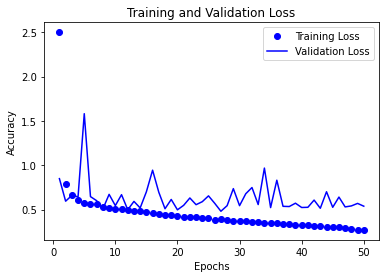

In [42]:
plot_model_history(regmodl3_history)

In [39]:
from prettytable import PrettyTable

predictions = regmodl3.predict(copyTest)

table = PrettyTable(['Pattern #', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'Activation', 'Target', 'Error'])


for i in range(10):
  error = abs(predictions[i] - y_tst[i])
  table.add_row([i + 1, Xtst[i][0], Xtst[i][1], Xtst[i][2], Xtst[i][3], Xtst[i][4], Xtst[i][5], Xtst[i][6], Xtst[i][7], Xtst[i][8], Xtst[i][9], Xtst[i][10], Xtst[i][11], predictions[i], y_tst[i], error])

print(table)

+-----------+-----+------+------+------+-------+------+-------+---------+------+------+------------------+-----+-------------+--------+--------------+
| Pattern # |  f1 |  f2  |  f3  |  f4  |   f5  |  f6  |   f7  |    f8   |  f9  | f10  |       f11        | f12 |  Activation | Target |    Error     |
+-----------+-----+------+------+------+-------+------+-------+---------+------+------+------------------+-----+-------------+--------+--------------+
|     1     | 7.4 | 0.44 | 0.2  | 11.5 | 0.049 | 44.0 | 157.0 |  0.998  | 3.27 | 0.44 |       9.0        | 0.0 | [5.0873604] |   5    | [0.08736038] |
|     2     | 6.5 | 0.23 | 0.36 | 16.3 | 0.038 | 43.0 | 133.0 | 0.99924 | 3.26 | 0.41 |       8.8        | 0.0 | [5.6274624] |   5    | [0.6274624]  |
|     3     | 5.6 | 0.41 | 0.24 | 1.9  | 0.034 | 10.0 |  53.0 | 0.98815 | 3.32 | 0.5  |       13.5       | 0.0 | [6.9921393] |   7    | [0.00786066] |
|     4     | 6.4 | 0.67 | 0.08 | 2.1  | 0.045 | 19.0 |  48.0 |  0.9949 | 3.49 | 0.49 |       

# Part 3: Classification Model


In [25]:
import copy

def predict_hit_ratio():
  val_labels_copy = copy.copy(y_val)
  np.random.shuffle(val_labels_copy)
  hits_array = np.array(y_val) == np.array(val_labels_copy)
  return hits_array.mean()

### Classification Model 1

In [ ]:
def build_clasmod1():
  model = keras.Sequential([
    layers.Dense(8,  activation="relu"),
    layers.Dense(4,  activation="softmax")
  ])
  model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]) 
  return model

clasmodl1 = build_clasmod1()

clasmodl1_history = clasmodl1.fit(x=Xtrain, y=one_hot_train_labels, batch_size=32, epochs=25, verbose=2, validation_data=(Xval,one_hot_val_labels), validation_freq=1)

clasmodl1.summary()

Epoch 1/25
153/153 - 1s - loss: 1.3606 - accuracy: 0.6695 - val_loss: 1.1330 - val_accuracy: 0.6749 - 1s/epoch - 9ms/step
Epoch 2/25
153/153 - 0s - loss: 0.8423 - accuracy: 0.7235 - val_loss: 0.7651 - val_accuracy: 0.7412 - 396ms/epoch - 3ms/step
Epoch 3/25
153/153 - 0s - loss: 0.6183 - accuracy: 0.7644 - val_loss: 0.6131 - val_accuracy: 0.7765 - 466ms/epoch - 3ms/step
Epoch 4/25
153/153 - 0s - loss: 0.5421 - accuracy: 0.7923 - val_loss: 0.5565 - val_accuracy: 0.7827 - 346ms/epoch - 2ms/step
Epoch 5/25
153/153 - 0s - loss: 0.5132 - accuracy: 0.8003 - val_loss: 0.5686 - val_accuracy: 0.7833 - 262ms/epoch - 2ms/step
Epoch 6/25
153/153 - 0s - loss: 0.5076 - accuracy: 0.8015 - val_loss: 0.5775 - val_accuracy: 0.7833 - 269ms/epoch - 2ms/step
Epoch 7/25
153/153 - 0s - loss: 0.5013 - accuracy: 0.8050 - val_loss: 0.6355 - val_accuracy: 0.7833 - 258ms/epoch - 2ms/step
Epoch 8/25
153/153 - 0s - loss: 0.4996 - accuracy: 0.8013 - val_loss: 0.6111 - val_accuracy: 0.7833 - 276ms/epoch - 2ms/step
Epo

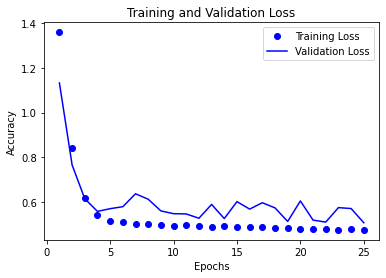

In [ ]:
plot_model_history(clasmodl1_history)

## Classification Model 2

In [ ]:
# Model number 2
def build_clasmod2():
  model = keras.Sequential([
    layers.Dense(32,  activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(4,  activation="softmax")
  ])
  model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]) 
  return model

clasmodl2 = build_clasmod2()

clasmodl2_history = clasmodl2.fit(x=Xtrain, y=one_hot_train_labels, batch_size=32, epochs=25, verbose=2, validation_data=(Xval,one_hot_val_labels), validation_freq=1)

clasmodl2.summary()

Epoch 1/25
153/153 - 1s - loss: 0.7536 - accuracy: 0.7560 - val_loss: 0.5991 - val_accuracy: 0.7820 - 1s/epoch - 10ms/step
Epoch 2/25
153/153 - 0s - loss: 0.6172 - accuracy: 0.7685 - val_loss: 0.5524 - val_accuracy: 0.7796 - 459ms/epoch - 3ms/step
Epoch 3/25
153/153 - 0s - loss: 0.5990 - accuracy: 0.7666 - val_loss: 0.7882 - val_accuracy: 0.7839 - 455ms/epoch - 3ms/step
Epoch 4/25
153/153 - 0s - loss: 0.5672 - accuracy: 0.7775 - val_loss: 0.5581 - val_accuracy: 0.7777 - 459ms/epoch - 3ms/step
Epoch 5/25
153/153 - 0s - loss: 0.5622 - accuracy: 0.7763 - val_loss: 0.7651 - val_accuracy: 0.7839 - 415ms/epoch - 3ms/step
Epoch 6/25
153/153 - 1s - loss: 0.5616 - accuracy: 0.7818 - val_loss: 0.5714 - val_accuracy: 0.7839 - 519ms/epoch - 3ms/step
Epoch 7/25
153/153 - 0s - loss: 0.5469 - accuracy: 0.7845 - val_loss: 0.8594 - val_accuracy: 0.7839 - 466ms/epoch - 3ms/step
Epoch 8/25
153/153 - 0s - loss: 0.5296 - accuracy: 0.7845 - val_loss: 1.2136 - val_accuracy: 0.4161 - 377ms/epoch - 2ms/step
Ep

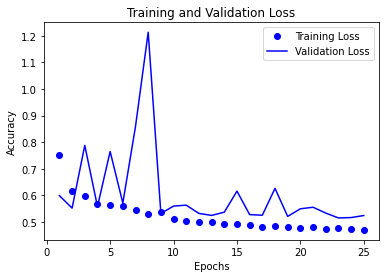

In [ ]:
plot_model_history(clasmodl2_history)

## Classification Model 3

In [34]:
# Model number 2
def build_clasmod3():
  model = keras.Sequential([
    layers.Dense(32,  activation="relu"),
    layers.Dense(8, activation="relu"),
    layers.Dense(4,  activation="softmax")
  ])
  model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"]) 
  return model

clasmodl3 = build_clasmod3()

clasmodl3_history = clasmodl3.fit(x=Xtrain, y=one_hot_train_labels, batch_size=32, epochs=25, verbose=2, validation_data=(Xval,one_hot_val_labels), validation_freq=1)

clasmodl3.summary()

Epoch 1/25
153/153 - 1s - loss: 0.6100 - accuracy: 0.7818 - val_loss: 0.6563 - val_accuracy: 0.7839 - 1s/epoch - 8ms/step
Epoch 2/25
153/153 - 0s - loss: 0.5209 - accuracy: 0.7968 - val_loss: 0.5764 - val_accuracy: 0.7833 - 258ms/epoch - 2ms/step
Epoch 3/25
153/153 - 0s - loss: 0.5206 - accuracy: 0.7970 - val_loss: 0.6181 - val_accuracy: 0.7839 - 244ms/epoch - 2ms/step
Epoch 4/25
153/153 - 0s - loss: 0.5073 - accuracy: 0.7962 - val_loss: 0.5369 - val_accuracy: 0.7827 - 246ms/epoch - 2ms/step
Epoch 5/25
153/153 - 0s - loss: 0.5003 - accuracy: 0.7956 - val_loss: 0.5618 - val_accuracy: 0.7851 - 272ms/epoch - 2ms/step
Epoch 6/25
153/153 - 0s - loss: 0.4984 - accuracy: 0.7989 - val_loss: 0.6417 - val_accuracy: 0.7839 - 357ms/epoch - 2ms/step
Epoch 7/25
153/153 - 0s - loss: 0.4953 - accuracy: 0.7970 - val_loss: 0.5445 - val_accuracy: 0.7901 - 255ms/epoch - 2ms/step
Epoch 8/25
153/153 - 0s - loss: 0.4852 - accuracy: 0.8015 - val_loss: 0.6530 - val_accuracy: 0.6495 - 242ms/epoch - 2ms/step
Epo

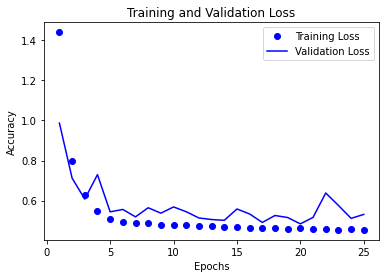

In [30]:
plot_model_history(clasmodl3_history)

In [35]:
from prettytable import PrettyTable

predictions = clasmodl3.predict(Xtst)

table = PrettyTable(['Pattern #', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'Activation', 'Target', 'Hit Ratio'])

for i in range(10):
  hitRatio = predictions[i].round()

  compare = one_hot_train_labels[i] == hitRatio
  isEqual = compare.all()

  table.add_row([i, Xtst[i][0], Xtst[i][1], Xtst[i][2], Xtst[i][3], Xtst[i][4], Xtst[i][5], Xtst[i][6], Xtst[i][7], Xtst[i][8], Xtst[i][9], Xtst[i][10], Xtst[i][11], predictions[i], one_hot_tst_labels[i], isEqual])

print(table)

+-----------+-----+------+------+------+-------+------+-------+---------+------+------+------------------+-----+-----------------------------------------------------------+---------------+-----------+
| Pattern # |  f1 |  f2  |  f3  |  f4  |   f5  |  f6  |   f7  |    f8   |  f9  | f10  |       f11        | f12 |                         Activation                        |     Target    | Hit Ratio |
+-----------+-----+------+------+------+-------+------+-------+---------+------+------+------------------+-----+-----------------------------------------------------------+---------------+-----------+
|     0     | 7.4 | 0.44 | 0.2  | 11.5 | 0.049 | 44.0 | 157.0 |  0.998  | 3.27 | 0.44 |       9.0        | 0.0 | [4.0729451e-03 8.4553301e-01 1.5017328e-01 2.2080101e-04] | [0. 1. 0. 0.] |    True   |
|     1     | 6.5 | 0.23 | 0.36 | 16.3 | 0.038 | 43.0 | 133.0 | 0.99924 | 3.26 | 0.41 |       8.8        | 0.0 | [1.9515286e-03 8.7961161e-01 1.1833242e-01 1.0448744e-04] | [0. 1. 0. 0.] |    True